In [13]:
import os, json, zipfile, tarfile
import kagglehub

CONFIG = "dataset_config.json"

def save_config(root):
    with open(CONFIG, "w") as f:
        json.dump({"dataset_root": root}, f)

def load_config():
    if os.path.exists(CONFIG):
        try:
            return json.load(open(CONFIG))["dataset_root"]
        except Exception:
            return None
    return None

def find_jpeg_dir(root):
    for r, dirs, files in os.walk(root):
        if 'JPEGImages' in dirs:
            return os.path.join(r, 'JPEGImages')
    return None

def ensure_dataset():
    # 1) try config
    root = load_config()
    if root and os.path.isdir(root) and find_jpeg_dir(root):
        print("Using dataset root from config:", root)
        return root

    # 2) try common cache location (same dir as your JSON files)
    candidate = os.path.dirname(r"C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_train2007.json")
    if os.path.isdir(candidate) and find_jpeg_dir(candidate):
        save_config(candidate)
        print("Found dataset in cache:", candidate)
        return candidate

    # 3) download (only if not found)
    print("Downloading dataset (only because not found locally)...")
    dataset_path = kagglehub.dataset_download("zaraks/pascal-voc-2007", force_download=True)
    if os.path.isdir(dataset_path):
        base = dataset_path
    else:
        base = os.path.dirname(dataset_path)
        # try to extract if it's an archive
        if dataset_path.lower().endswith(".zip"):
            with zipfile.ZipFile(dataset_path, "r") as z: z.extractall(base)
        else:
            try:
                with tarfile.open(dataset_path, "r:*") as t: t.extractall(base)
            except Exception:
                pass

    jpeg = find_jpeg_dir(base)
    if jpeg:
        save_config(base)
        print("Dataset ready at:", base)
        return base

    raise RuntimeError("Impossibile trovare o estrarre le immagini under " + base)

dataset_root = ensure_dataset()

Resuming download from 51380224 bytes (1723471404 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/zaraks/pascal-voc-2007?dataset_version_number=1 (51380224/1774851628) bytes left.


100%|██████████| 1.65G/1.65G [30:59<00:00, 927kB/s]  

Extracting files...


Dataset ready at: C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1


In [14]:
# fissiamo il percorso assoluto C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_train2007.json e una volta impostato il path, apriamo il file json per ispezionarlo
# creiamo path = r"C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_train2007.json"
import os
import json
path = r"C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_train2007.json"
with open(path, 'r') as f:
    data = json.load(f)

# ispezioniamo il contenuto
print("Keys in the JSON file:", data.keys())
# ci sono le chiavi: images, type, annotations, categories

# ispezioniamo le prime 5 immagini
print("First 5 images:", data['images'][:5])
# ispezioniamo le prime 5 annotazioni
print("First 5 annotations:", data['annotations'][:5])
# ispezioniamo le categorie
print("Categories:", data['categories'])
# ispezioniamo il tipo di dataset
print("Type of dataset:", data['type'])

# visualizziamo 3 immagini e basta
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def visualize_image(image_id):
    image_info = next(img for img in data['images'] if img['id'] == image_id)
    fname = image_info['file_name']

    # candidati rapidi
    candidates = [
        os.path.join(dataset_root, fname),
        os.path.join(dataset_root, 'JPEGImages', fname),
        os.path.join(dataset_root, 'VOC2007', 'JPEGImages', fname),
        os.path.join(dataset_root, 'images', fname),
        os.path.join(os.path.dirname(path), fname)  # fallback vicino al JSON
    ]

    image_path = None
    for c in candidates:
        if os.path.exists(c):
            image_path = c
            break

    if image_path is None:
        # ricerca ricorsiva come ultima risorsa
        for root, _, files in os.walk(dataset_root):
            if fname in files:
                image_path = os.path.join(root, fname)
                break

    if image_path is None:
        raise FileNotFoundError(f"Immagine {fname} non trovata sotto {dataset_root}")

    image = plt.imread(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]
    for ann in annotations:
        bbox = ann['bbox']
        category_name = next(cat['name'] for cat in data['categories'] if cat['id'] == ann['category_id'])
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(bbox[0], bbox[1] - 10, category_name, color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

Keys in the JSON file: dict_keys(['images', 'type', 'annotations', 'categories'])
First 5 images: [{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12}, {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17}, {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23}, {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26}, {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]
First 5 annotations: [{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]], 'area': 34104, 'iscrowd': 0, 'image_id': 12, 'bbox': [155, 96, 196, 174], 'category_id': 7, 'id': 1, 'ignore': 0}, {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]], 'area': 13110, 'iscrowd': 0, 'image_id': 17, 'bbox': [184, 61, 95, 138], 'category_id': 15, 'id': 2, 'ignore': 0}, {'segmentation': [[89, 77, 89, 336, 403, 336, 403, 77]], 'area': 81326, 'iscrowd': 0, 'image_id': 17, 'bbox': [89, 77, 314, 259], 'category_id': 13, 'id': 3, 'ignore': 0}, {'segmentation': [[

StopIteration: 

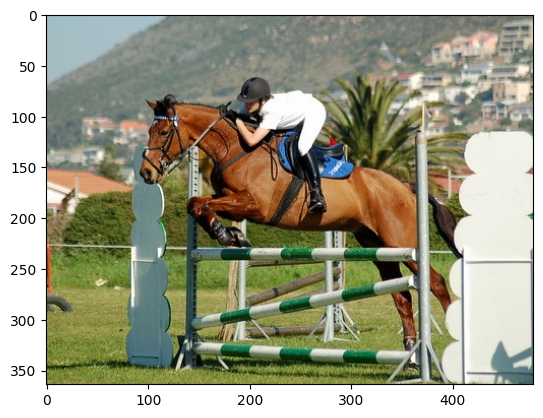

In [73]:
visualize_image(17)

In [ ]:
# so now we have a dataset and we want to create a CNN to train on it and recognize objects in images

import torch
import torch.nn as nn
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
                nn.Linear(32 * 56 * 56, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
num_classes = len(data['categories'])
model = SimpleCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# now we need to train it on the dataset
# but first we need to create a DataLoader for the dataset
from torch.utils.data import Dataset, DataLoader
from PIL import Image
class PascalVOCDataset(Dataset):
    def __init__(self, data, root, transform=None):
        self.data = data
        self.root = root
        self.transform = transform

    def __len__(self):
        return len(self.data['images'])

    def __getitem__(self, idx):
        image_info = self.data['images'][idx]
        fname = image_info['file_name']

        # candidati rapidi
        candidates = [
            os.path.join(self.root, fname),
            os.path.join(self.root, 'JPEGImages', fname),
            os.path.join(self.root, 'VOC2007', 'JPEGImages', fname),
            os.path.join(self.root, 'images', fname),
            os.path.join(os.path.dirname(path), fname)  # fallback vicino al JSON
        ]

        image_path = None
        for c in candidates:
            if os.path.exists(c):
                image_path = c
                break

        if image_path is None:
            # ricerca ricorsiva come ultima risorsa
            for root, _, files in os.walk(self.root):
                if fname in files:
                    image_path = os.path.join(root, fname)
                    break

        if image_path is None:
            raise FileNotFoundError(f"Immagine {fname} non trovata sotto {self.root}")

        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # per semplicità, prendiamo solo la prima annotazione
        annotations = [ann for ann in self.data['annotations'] if ann['image_id'] == image_info['id']]
        label = annotations[0]['category_id'] - 1  # assuming category_id starts from 1

        return image, label
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
dataset = PascalVOCDataset(data, dataset_root, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [24]:
# training loop
from tqdm.notebook import tqdm
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = len(dataloader)
    for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (batch_idx+1) % 10 == 0 or (batch_idx+1) == total_batches:
            pct = 100*(batch_idx+1)/total_batches
            tqdm.write(f"Epoch {epoch+1}/{num_epochs} - Batch {batch_idx+1}/{total_batches} ({pct:.1f}%) - Loss batch: {loss.item():.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/total_batches:.4f}")

# save the trained model
torch.save(model.state_dict(), "simple_cnn_pascalvoc.pth")  


Epoch 1/5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1/5 - Batch 10/79 (12.7%) - Loss batch: 2.6855
Epoch 1/5 - Batch 20/79 (25.3%) - Loss batch: 2.5042
Epoch 1/5 - Batch 30/79 (38.0%) - Loss batch: 2.5224
Epoch 1/5 - Batch 40/79 (50.6%) - Loss batch: 2.2366
Epoch 1/5 - Batch 50/79 (63.3%) - Loss batch: 2.4874
Epoch 1/5 - Batch 60/79 (75.9%) - Loss batch: 2.6772
Epoch 1/5 - Batch 70/79 (88.6%) - Loss batch: 2.2269
Epoch 1/5 - Batch 79/79 (100.0%) - Loss batch: 2.3960
Epoch 1/5, Loss: 2.5318


Epoch 2/5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/5 - Batch 10/79 (12.7%) - Loss batch: 2.2000
Epoch 2/5 - Batch 20/79 (25.3%) - Loss batch: 2.1742
Epoch 2/5 - Batch 30/79 (38.0%) - Loss batch: 2.1491
Epoch 2/5 - Batch 40/79 (50.6%) - Loss batch: 1.9492
Epoch 2/5 - Batch 50/79 (63.3%) - Loss batch: 2.2399
Epoch 2/5 - Batch 60/79 (75.9%) - Loss batch: 1.6041
Epoch 2/5 - Batch 70/79 (88.6%) - Loss batch: 1.2197
Epoch 2/5 - Batch 79/79 (100.0%) - Loss batch: 0.9134
Epoch 2/5, Loss: 1.9220


Epoch 3/5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/5 - Batch 10/79 (12.7%) - Loss batch: 1.2952
Epoch 3/5 - Batch 20/79 (25.3%) - Loss batch: 0.9179
Epoch 3/5 - Batch 30/79 (38.0%) - Loss batch: 1.2480
Epoch 3/5 - Batch 40/79 (50.6%) - Loss batch: 0.6975
Epoch 3/5 - Batch 50/79 (63.3%) - Loss batch: 1.0739
Epoch 3/5 - Batch 60/79 (75.9%) - Loss batch: 0.7402
Epoch 3/5 - Batch 70/79 (88.6%) - Loss batch: 0.7941
Epoch 3/5 - Batch 79/79 (100.0%) - Loss batch: 0.4355
Epoch 3/5, Loss: 0.8645


Epoch 4/5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/5 - Batch 10/79 (12.7%) - Loss batch: 0.1506
Epoch 4/5 - Batch 20/79 (25.3%) - Loss batch: 0.1713
Epoch 4/5 - Batch 30/79 (38.0%) - Loss batch: 0.0931
Epoch 4/5 - Batch 40/79 (50.6%) - Loss batch: 0.2789
Epoch 4/5 - Batch 50/79 (63.3%) - Loss batch: 0.2898
Epoch 4/5 - Batch 60/79 (75.9%) - Loss batch: 0.3441
Epoch 4/5 - Batch 70/79 (88.6%) - Loss batch: 0.2095
Epoch 4/5 - Batch 79/79 (100.0%) - Loss batch: 0.0704
Epoch 4/5, Loss: 0.2080


Epoch 5/5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/5 - Batch 10/79 (12.7%) - Loss batch: 0.0805
Epoch 5/5 - Batch 20/79 (25.3%) - Loss batch: 0.0472
Epoch 5/5 - Batch 30/79 (38.0%) - Loss batch: 0.0204
Epoch 5/5 - Batch 40/79 (50.6%) - Loss batch: 0.0379
Epoch 5/5 - Batch 50/79 (63.3%) - Loss batch: 0.0330
Epoch 5/5 - Batch 60/79 (75.9%) - Loss batch: 0.0275
Epoch 5/5 - Batch 70/79 (88.6%) - Loss batch: 0.2319
Epoch 5/5 - Batch 79/79 (100.0%) - Loss batch: 0.0151
Epoch 5/5, Loss: 0.0737


In [ ]:
# let's see how it behaves on evaluation found at path = r"C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_train2007.json"
# LETS EVALUATE ON THE FOLLOWING PATH path = r"C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_train2007.json"

eval = r"C:\Users\teresa i robert\.cache\kagglehub\datasets\zaraks\pascal-voc-2007\versions\1\PASCAL_VOC\PASCAL_VOC\pascal_val2007.json"
with open(eval, 'r') as f:
    eval_data = json.load(f)
eval_dataset = PascalVOCDataset(eval_data, dataset_root, transform=transform)
eval_dataloader = DataLoader(eval_dataset, batch_size=32, shuffle=False)
# evaluation loop
model.eval()
correct = 0
total = 0   
with torch.no_grad():
    for images, labels in eval_dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f'Accuracy on evaluation dataset: {accuracy:.2f}%')



Accuracy on evaluation dataset: 21.63%


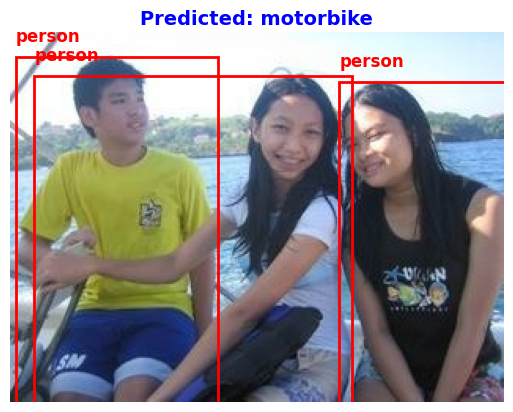

In [72]:
# visualizziamo una immagine del dataset di valutazione con le predizioni del modello 

def visualize_image_with_predictions(image_id):
    image_info = next(img for img in eval_data['images'] if img['id'] == image_id)
    fname = image_info['file_name']

    # candidati rapidi
    candidates = [
        os.path.join(dataset_root, fname),
        os.path.join(dataset_root, 'JPEGImages', fname),
        os.path.join(dataset_root, 'VOC2007', 'JPEGImages', fname),
        os.path.join(dataset_root, 'images', fname),
        os.path.join(os.path.dirname(eval), fname)  # fallback vicino al JSON
    ]

    image_path = None
    for c in candidates:
        if os.path.exists(c):
            image_path = c
            break

    if image_path is None:
        # ricerca ricorsiva come ultima risorsa
        for root, _, files in os.walk(dataset_root):
            if fname in files:
                image_path = os.path.join(root, fname)
                break

    if image_path is None:
        raise FileNotFoundError(f"Immagine {fname} non trovata sotto {dataset_root}")

    image = plt.imread(image_path)
    input_image = transform(Image.open(image_path).convert('RGB')).unsqueeze(0)

    model.eval()
    with torch.no_grad():
        outputs = model(input_image)
        _, predicted = torch.max(outputs.data, 1)
        predicted_label = predicted.item()

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    annotations = [ann for ann in eval_data['annotations'] if ann['image_id'] == image_id]
    for ann in annotations:
        bbox = ann['bbox']
        category_name = next(cat['name'] for cat in eval_data['categories'] if cat['id'] == ann['category_id']) 
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(bbox[0], bbox[1] - 10, category_name, color='red', fontsize=12, weight='bold')
    predicted_category_name = next(cat['name'] for cat in eval_data['categories'] if cat['id'] == predicted_label + 1)
    plt.title(f'Predicted: {predicted_category_name}', color='blue', fontsize=14, weight='bold')
    plt.axis('off')
    plt.show()

# senza specificare l'id immagine, ne peschiamo una a caso
import random
random_image_id = random.choice(eval_data['images'])['id']
visualize_image_with_predictions(random_image_id)